## Demo of Cluster pictures in SageMath

Reload the module whenever it changes for easy development:

In [1]:
%load_ext autoreload
%autoreload 2
from sage_cluster_pictures.cluster_pictures import Cluster

Example 1.2 of DMDM

In [2]:
p = 7
x = polygen(Qp(p))
H = HyperellipticCurve((x-1)*(x-(1+p^2))*(x-(1-p^2))*(x-p)*x*(x-p^3)*(x+p^3))
C = Cluster.from_curve(H)
C

Cluster with 7 roots and 2 children

We can display the cluster as ASCII art and unicode art

In [3]:
%display ascii_art
C

((* * *) *) (* * *)

In [4]:
%display unicode_art

In [5]:
C

((● ● ●) ●) (● ● ●)

Finally we should be able to display the nice Tikz graphs, this required a teeny bit of hacking sage.
https://trac.sagemath.org/ticket/19515

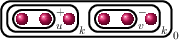

In [6]:
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True
view(C)

Let's test some basic functionality.

In [7]:
C.is_even()

False

In [8]:
C.is_odd()

True

In [9]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(6), K(5), K(10)])
C.is_ubereven()

True

In [10]:
C

(● ●) (● ●)

In [11]:
%display plain
list(C.all_descendents())

[Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children,
 Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children]

In [12]:
C.children()[0].children()[0].is_proper()

False

In [13]:
C.children()[0].parent_cluster()

Cluster with 4 roots and 2 children

Finally we can make this last example again from just root valuation data, a matrix of valuations of differences. This way we don't pick a prime $p$.

In [14]:
C = Cluster(Matrix(ZZ, 4, 4,[
                   [20, 1, 0, 0 ],
                   [1, 20, 0, 0 ],
                   [0, 0, 20, 1 ],
                   [0, 0, 1, 20 ],
                ]))
C.is_ubereven()

True

In [15]:
print(unicode_art(C))

(● ●) (● ●)


Let's see if it can handle Raymond's example from the draft:

In [16]:
K = Qp(3)
x = polygen(K)
H = HyperellipticCurve(x*(x - 3)*(x - 4)*(x - 13)*(x + 1)*(x + 5))
C = Cluster.from_curve(H)
C

Cluster with 6 roots and 3 children

In [17]:
%display unicode_art
C

● (● ● ●) (● ●)

so far so good!

In [18]:
C = Cluster.from_roots([K(1), K(5), K(10)])
C.children()[0].is_twin()

True

In [19]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])
C.is_top_cluster()

True

In [20]:
C.children()[0].is_top_cluster()

False

In [21]:
C.relative_depth()

0

In [22]:
C.children()[1].relative_depth()

1

In [23]:
C2 = Cluster.from_roots([K(5), K(25), K(50)])
C2.depth()

1

In [24]:
C2.relative_depth()

1

In [25]:
C2.children()[1].relative_depth()

1

In [26]:
C2.genus()

1

In [39]:
C = Cluster.from_roots([K(1), K(6), K(26), K(126)])
C.children()[0].children()[0].children()[0].top_cluster()

((● ●) ●) ●

In [37]:
C.children()[0].children()[0].depth()

3

In [38]:
C.children()[0].children()[0].relative_depth()

1

Example 3.5 in the users guide

In [103]:
K = Qp(7,150)
x = polygen(K)
L = K.extension(x^2 + 1,names='a')
x = polygen(L)
L2 = L.extension(x^2 - 7, names='b')
x = polygen(L2)
H = HyperellipticCurve((x^2+7^2)*(x^2-7^(15))*(x-7^6)*(x-7^6-7^9))
R = Cluster.from_curve(H)
R

Cluster with 6 roots and 3 children

In [104]:
R.depth()

2

In [105]:
%display plain
a = R.children()[0]
a.depth()

12

In [106]:
a.relative_depth()

10

In [107]:
t1 = a.children()[0]
t1.depth()

15

In [108]:
t2 = a.children()[1]
t2.depth()

18

In [109]:
a.is_ubereven()

True

In [110]:
t1.is_twin()

True

In [111]:
t2.is_twin()

True

In [112]:
R.is_cotwin()

True

In [113]:
a.is_cotwin()

False

In [114]:
t1.is_cotwin()

False

In [127]:
[c for c in R.all_descendents() if c.is_principal()]

[Cluster with 4 roots and 2 children]

In [128]:
a.is_principal()

True